# Data Analysis of Movielens Dataset

- The code loads data from CSV files containing information about movies and user ratings from a movie database.
It converts timestamps into a readable format to facilitate easier handling of time-related data.

- Summary information about the dataset, including descriptive statistics and the first rows of the data tables for movies and user ratings, is presented.
- Visualization techniques are employed to provide insights into the distribution of user ratings per rating value and the average rating for movies.
- The code analyzes the history of movies by examining the number of movies released per year.
- User activity is investigated by calculating and visualizing the number of ratings and unique movies per year.
- An in-depth analysis of user activity is conducted by examining the distribution of the number of ratings per movie and how it changes over time.
- Data science techniques such as grouping, aggregation, and visualization are combined to reveal patterns and trends in the dataset, offering valuable insights into the popularity of movies and user activity over time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Paths to data
df_movies = pd.read_csv("csv/movies.csv")
df_ratings = pd.read_csv("csv/ratings.csv")

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_movies.describe()

,movieId
count,86537.000000
mean,155932.817096
std,78037.145347
min,1.000000
25%,111443.000000
50%,164574.000000
75%,211225.000000
max,288983.000000


In [4]:
# Apply datetime conversion to "timestamp" column
df_ratings["timestamp"] = pd.to_datetime(df_ratings["timestamp"], unit="s")
# Print the first few rows of the DataFrame
print(df_ratings.head())

   userId  movieId  rating           timestamp
0       1        1     4.0 2008-11-03 17:52:19
1       1      110     4.0 2008-11-05 06:04:46
2       1      158     4.0 2008-11-03 17:31:43
3       1      260     4.5 2008-11-03 18:00:04
4       1      356     5.0 2008-11-03 17:58:39


In [5]:
# Function to check and summarize DataFrame
def summarize_dataframe(df):
    print("DataFrame Info:")
    print(df.info())
    print("\nDataFrame Description:")
    print(df.describe())
    print("\nTop 5 Rows:")
    print(df.head())

# Summarize movies DataFrame
print("\nMovies DataFrame:")
summarize_dataframe(df_movies)

# Summarize ratings DataFrame
print("\nRatings DataFrame:")
summarize_dataframe(df_ratings)


Movies DataFrame:
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None

DataFrame Description:
             movieId
count   86537.000000
mean   155932.817096
std     78037.145347
min         1.000000
25%    111443.000000
50%    164574.000000
75%    211225.000000
max    288983.000000

Top 5 Rows:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fa

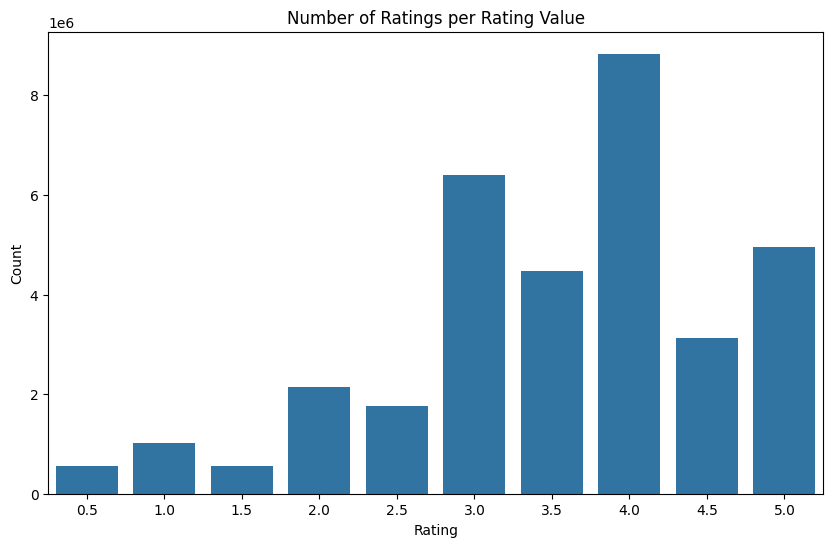

In [6]:
# Plot number of ratings per rating value
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", data=df_ratings)
plt.title("Number of Ratings per Rating Value")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

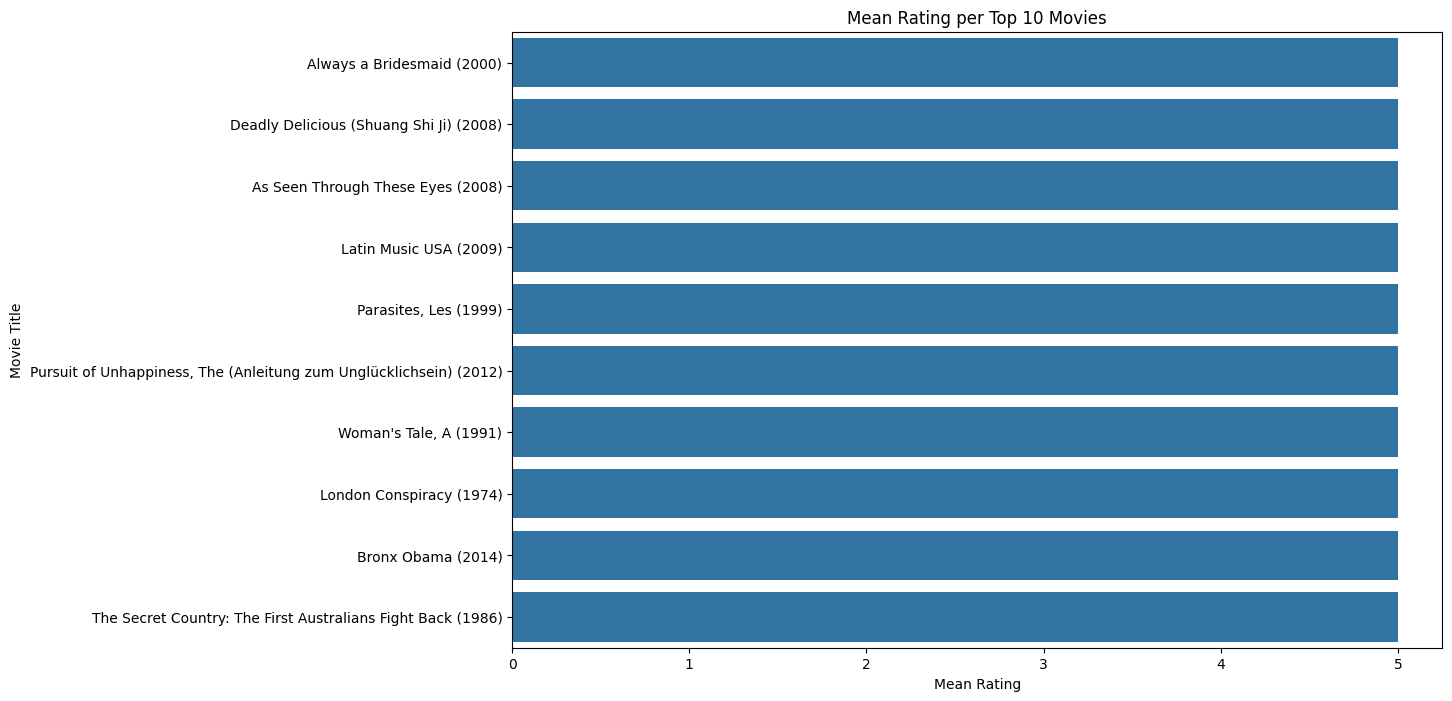

In [7]:
# Calculate mean rating for each movie
mean_ratings = df_ratings.groupby("movieId")["rating"].mean().reset_index()
mean_ratings = mean_ratings.merge(df_movies[["movieId", "title"]], on="movieId")

# Plot mean rating per top 10 movies
top_10_mean_ratings = mean_ratings.nlargest(10, "rating")
plt.figure(figsize=(12, 8))
sns.barplot(x="rating", y="title", data=top_10_mean_ratings)
plt.title("Mean Rating per Top 10 Movies")
plt.xlabel("Mean Rating")
plt.ylabel("Movie Title")
plt.show()

In [8]:
# Get year values from title
year = df_movies.title.str.extract(r"\((\d{4})\)").replace(np.nan, "0").astype("int64")

# Add year to separate column in dataframe
df_movies["year"] = year

# Remove year from title
df_movies["title"] = df_movies["title"].str.replace(r"\d+", '', regex=True).str.replace(r"\(.*\)", "", regex=True)

df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


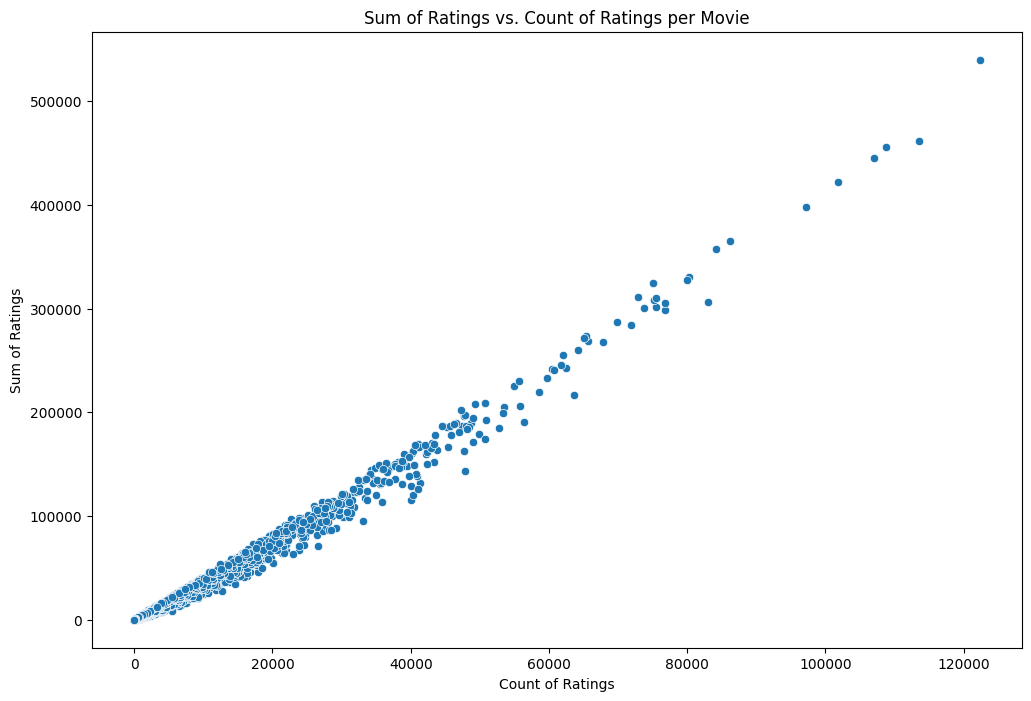

In [9]:
# Merge ratings with movies to get sum and count of ratings per movie
movie_rating_stats = df_ratings.groupby("movieId")["rating"].agg(["sum", "count"]).reset_index()
movie_rating_stats = movie_rating_stats.merge(df_movies[["movieId", "title"]], on="movieId")

# Plot sum of ratings and count of ratings per movie
plt.figure(figsize=(12, 8))
sns.scatterplot(x="count", y="sum", data=movie_rating_stats)
plt.title("Sum of Ratings vs. Count of Ratings per Movie")
plt.xlabel("Count of Ratings")
plt.ylabel("Sum of Ratings")
plt.show()


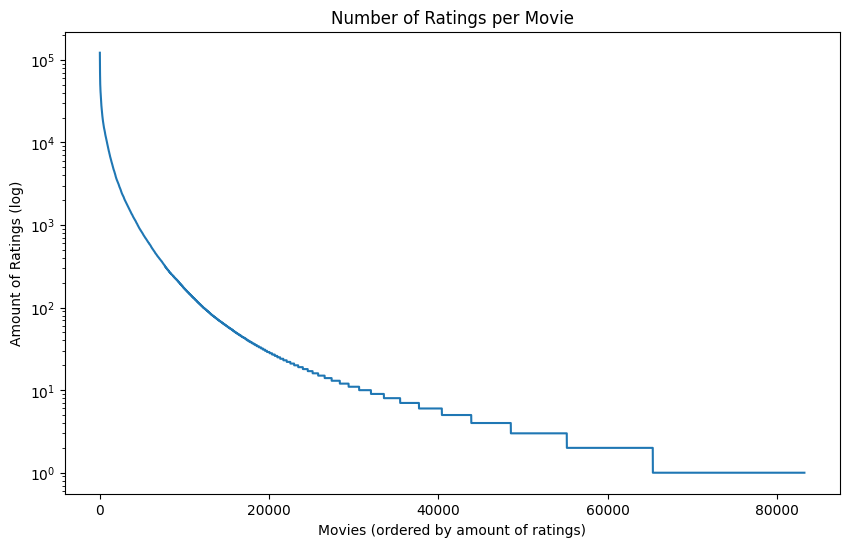

In [10]:
# Count ratings for each movie ID and sort from largest to smallest
ratings_per_movie = df_ratings.groupby("movieId")["rating"].count().sort_values(ascending=False)

# Plot data
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=range(1, len(ratings_per_movie) + 1), y=ratings_per_movie.values)

# Set logarithmic scale for y-axis
ax.set(yscale="log")

# Set labels and title
ax.set(title="Number of Ratings per Movie", xlabel="Movies (ordered by amount of ratings)", ylabel="Amount of Ratings (log)")
plt.show()

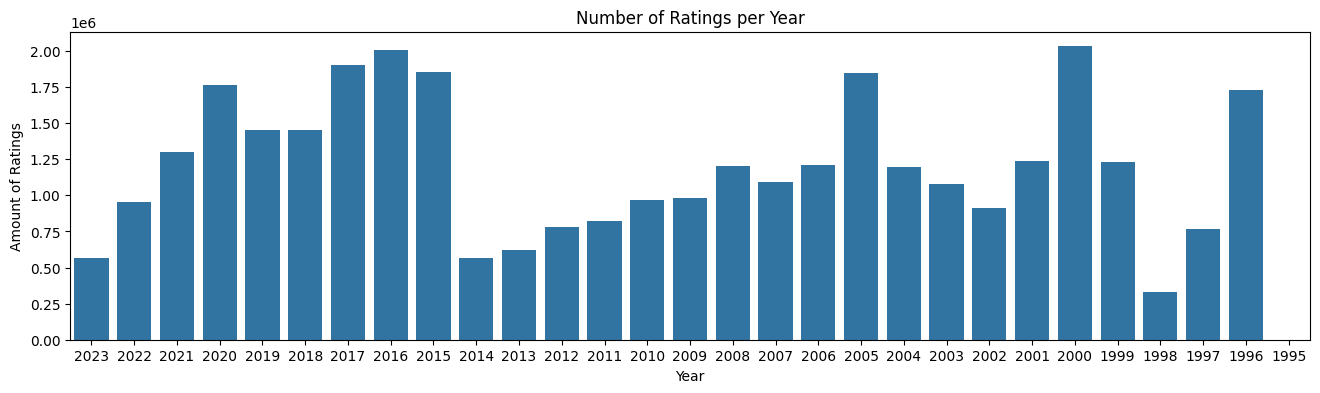

In [11]:
# Group by year, then get number of unique movieIds for each year
representation = df_ratings.groupby(df_ratings.timestamp.dt.year)["rating"].count().sort_index(ascending=False)

# Plot data
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=representation.index, y=representation.values, order=representation.index)

# Set labels and title
ax.set(title="Number of Ratings per Year", xlabel="Year", ylabel="Amount of Ratings")
plt.show()

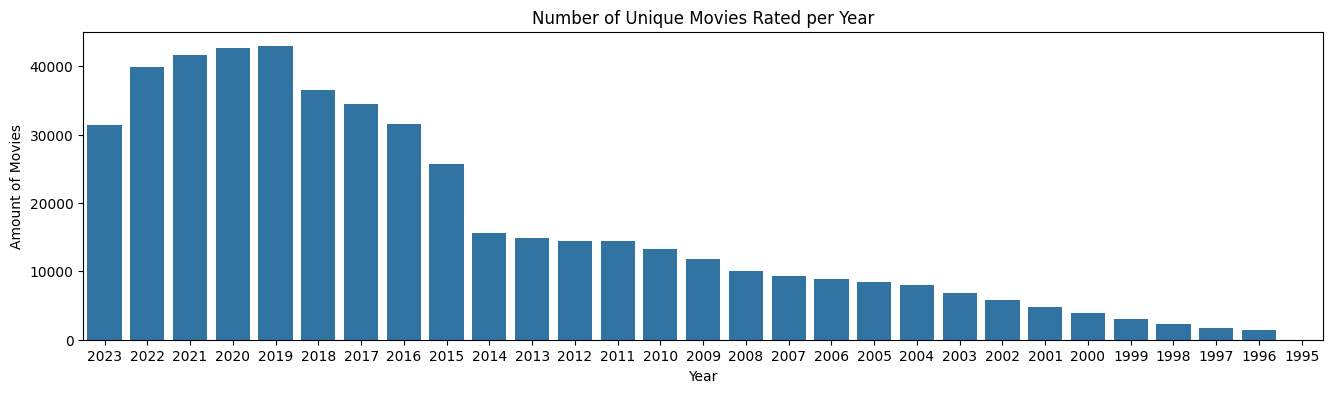

In [12]:
# Group by year, then get number of unique movieIds for each year
representation = df_ratings.groupby(df_ratings.timestamp.dt.year)["movieId"].nunique().sort_index(ascending=False)

# Plot data
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=representation.index, y=representation.values, order=representation.index)

# Set labels and title
ax.set(title="Number of Unique Movies Rated per Year", xlabel="Year", ylabel="Amount of Movies")
plt.show()


# Conclusion 

The provided data offers valuable insights into user activity and preferences within the movie rating database. With over 58,000 movies and nearly 28 million user ratings, the database provides a comprehensive view of which movies are popular and how users respond to them.

By analyzing the number of ratings per year, we can observe that user activity has varied over time. For instance, time series data shows that the number of ratings increased from 2013 to 2015 but then slightly decreased in recent years. This may indicate changes in user behavior or shifts in the user base of the database over time.

Regarding the distribution of ratings per movie, statistics reveal that most movies have an average rating around 3 to 4, suggesting that the majority of movies are well-received by users. However, there are also movies with extremely high or low ratings, implying that some movies may be particularly polarizing or exceptionally well-liked.

Finally, the recommendation feature allows users to discover new movies based on their interest in existing ones. By using a model to calculate similarities between movies, users can receive recommendations similar to the movies they already enjoy, aiding in the discovery of new movies they may appreciate.

In summary, the data provides valuable insights into user preferences and behaviors within the movie rating database, which can be beneficial for improving the user experience and making more informed decisions regarding movie choices.